In [ ]:
# utilities
import re #re para regular expressions
import numpy as np
import pandas as pd
import string 
import nltk #natural language toolkit -> lenguaje natural de los humanos
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer #La lematización es un proceso lingüístico que consiste en hallar el lema correspondiente.
# El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra
#lematización es como llevar la palabra a su más basico -> limones-limon nueces-nuez corrupta-corrupto
# sklearn
from sklearn.svm import LinearSVC #linear support vector classification
from sklearn.naive_bayes import BernoulliNB #Naive Bayes classifier for multivariate Bernoulli models.
from sklearn.metrics import accuracy_score #Accuracy classification score.
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#classifier
from xgboost import XGBClassifier
#no accents
!pip install unidecode
from unidecode import unidecode 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.9 MB/s eta 0:00:00


In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#READ THE DATASET
df = pd.read_excel('/content/drive/MyDrive/Big Data/LabeledText.xlsx')
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [ ]:
print('size of the dataset:', len(df))
print('different labels:', df['LABEL'].nunique())

size of the dataset: 4869
different labels: 3


In [ ]:
#put all the letters in lowercase
df['Caption'] = df['Caption'].str.lower()

In [ ]:
df['LABEL'].value_counts(normalize=True)*100

neutral     36.372972
positive    33.805710
negative    29.821319
Name: LABEL, dtype: float64

In [ ]:
df.isnull().sum()

File Name    0
Caption      0
LABEL        0
dtype: int64

In [ ]:
#Making a list of stopwords
stopwordlist = ['rt','a', 'e', 'i', 'o', 'u','about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', 'rt', 'RT', '@', 'im', 'dont', "don't", 'take', 'make', 'u', 'new', 'today', 'get'
             'got', 'day', 'year','time', 'look', 'man', 'girl', 'boy', 'go', 'htt', 'dog', 'cat', 'see', 'one']

In [ ]:
captions=df['Caption']
captions=captions.map(lambda x:unidecode(x))

In [ ]:
#remove all stopwords
SW = set(stopwordlist) #A set is a collection of unique data. That is, elements of a set cannot be duplicate. For example,
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in SW]) # "" las comillas es para unir los elementos de una tupla separados por lo que haya dentro
    #en este caso un espacio en blanco
captions = captions.apply(lambda text: cleaning_stopwords(text)) #se le aplica a la columna caption la función de limpiar
#los stopwords

In [ ]:
#remove ponctuation
english_punctuations = string.punctuation #retorna !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list) #nake trans cambia en el texto el primer parametro por el segundo , el tercer
    #parametro describe que caracteres cambiar del texto que se da
    return text.translate(translator)
captions= captions.apply(lambda x: cleaning_punctuations(x))

In [ ]:
#Remove URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data) #searches for all the instances of pattern in the given string, and replaces them
    #(pat, replacement, str)
captions = captions.apply(lambda x: cleaning_URLs(x))

In [ ]:
#Remove numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
captions = captions.apply(lambda x: cleaning_numbers(x))

In [ ]:
#stemming Stemming es un método para reducir una palabra a su raíz o a un stem. 
st = nltk.PorterStemmer()  #para hacer el steam de las palabras
def stemming_on_text(data):
    text = [st.stem(word) for word in data] #stem se crea una función que surge del nltk.PorterStemmer() para hacer el stem
    return data
captions= captions.apply(lambda x: stemming_on_text(x))

In [ ]:
#words in french
#captions.map(lambda x:nltk.tokenize.word_tokenize(x, language='french', preserve_line=False))

In [ ]:
#words in greek
#captions.map(lambda x:nltk.tokenize.word_tokenize(x, language='greek', preserve_line=False))

In [ ]:
#words in spanish
captions.map(lambda x:nltk.tokenize.word_tokenize(x, language='spanish', preserve_line=False))

0                      [feel, legday, jelly, aching, gym]
1       [arrivatw, absolute, disgrace, two, carriages,...
2       [valentines, nephews, elated, sometimes, littl...
3       [betterfeelingfilms, via, instagram, first, fi...
4              [zoes, first, love, rattled, johnnyharper]
                              ...                        
4864    [omg, well, done, eskom, man, dies, loadsheddi...
4865          [feelin, love, here, valentinesday, caring]
4866                           [blue, eyes, cant, beaten]
4867            [la, chucha, louuu, te, chupo, los, ojos]
4868    [colorsplashbw, zealous, remedios, herbales, t...
Name: Caption, Length: 4869, dtype: object

Anita


In [ ]:
le = LabelEncoder() #codifica etiquetas de una característica categórica en valores numéricos entre 0 y el número de clases menos 1.
df['LABEL'] = le.fit_transform(df['LABEL']) #Una vez instanciado, el método fit lo entrena (creando el mapeado entre las etiquetas y los números)
#y el método transform transforma las etiquetas que se incluyan como argumento en los números correspondientes. 
#El método fit_transform realiza ambas acciones simultáneamente.

In [ ]:
#Split data
X = df.Caption
y = df.LABEL
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42) #el random state es un seed

<Axes: xlabel='LABEL', ylabel='count'>

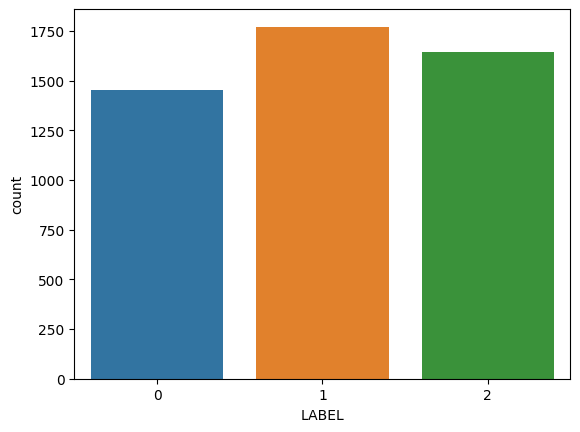

In [ ]:
#See the distribution
sns.countplot(x='LABEL', data=df)

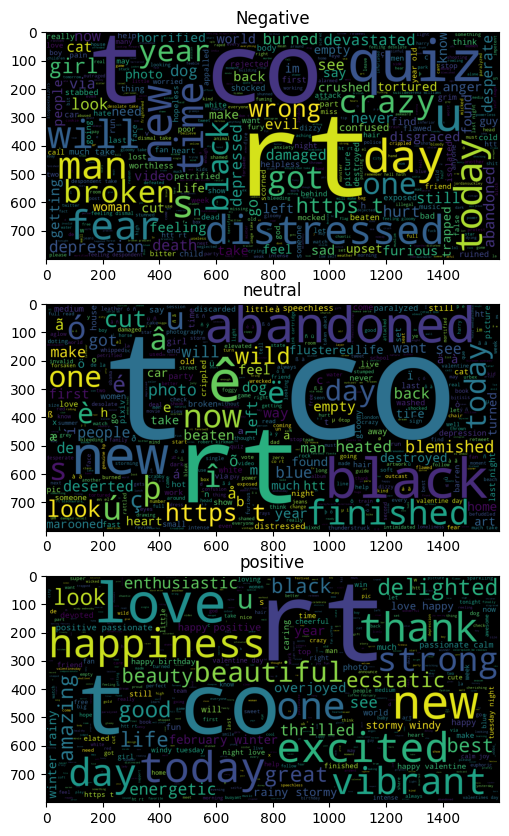

In [ ]:
#separating data by their labels
df_negative = df.groupby('LABEL')['Caption'].get_group(0)
df_neutral = df.groupby('LABEL')['Caption'].get_group(1)
df_positive = df.groupby('LABEL')['Caption'].get_group(2)
#making wordclouds
wc0 = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df_negative))
wc1 = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df_neutral))
wc2 = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df_positive))
#vizualize wordclouds
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.imshow(wc0)
plt.title('Negative')
plt.subplot(3, 1, 2)
plt.imshow(wc1)
plt.title('neutral')
plt.subplot(3, 1, 3)
plt.imshow(wc2)
plt.title('positive')
plt.show()

In [ ]:
#building the vectoriser
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
#train the vectoriser
vectoriser.fit(X_train)

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [ ]:
#Vectorise data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [ ]:
#Testing with Random Forest Classifier
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)
y_pred2 = RFmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("accuracy:", accuracy)

accuracy: 0.6591375770020534


In [ ]:
#Testing with XGBoost
XGmodel = XGBClassifier()
XGmodel.fit(X_train, y_train)
y_pred3 = XGmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("accuracy:", accuracy)

accuracy: 0.6827515400410678


In [ ]:
#Testing with SVM
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(X_train, y_train)
y_pred4 = SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
print("accuracy:", accuracy)

accuracy: 0.6971252566735113


In [ ]:
#Tesing with Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred5 = LRmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred5)
print("accuracy:", accuracy)

accuracy: 0.6940451745379876


3.Procesamiento de datos con Apache Spark: Apache Spark es un motor de procesamiento distribuido que permite procesar grandes volúmenes de datos. En este caso, se puede utilizar PySpark, la API de Python para Spark, para procesar los datos almacenados en MongoDB y realizar un análisis de sentimientos.

4.Análisis de sentimientos: Para realizar el análisis de sentimientos, se pueden utilizar bibliotecas de Python como TextBlob o NLTK. Estas bibliotecas permiten analizar el texto de los tweets y determinar si tienen un sentimiento positivo, negativo o neutro.

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# TextBlob
TextBlob es una biblioteca de procesamiento de lenguaje natural (PLN) en Python que se utiliza para realizar tareas como análisis de sentimientos, etiquetado de partes del discurso, traducción de idiomas, corrección ortográfica, extracción de frases clave, entre otras.

unicodedata.normalize('NFKD', palabra):

 El primer argumento 'NFKD' ej:la letra "á" se descompone en una "a" sin acento y un acento separado.

.encode('ASCII', 'ignore'): Una vez que la palabra ha sido normalizada, se codifica en un formato ASCII, el cual es un conjunto de caracteres que no incluye acentos ni otros caracteres diacríticos. El argumento 'ignore' especifica que los caracteres que no pueden ser codificados en ASCII deben ser ignorados en lugar de generar un error.

.decode('utf-8'): Finalmente, la cadena codificada en ASCII se decodifica nuevamente en una cadena Unicode utilizando el formato UTF-8, el cual es un estándar de codificación de caracteres que permite representar una amplia variedad de caracteres, incluyendo acentos y diacríticos.

In [ ]:
from textblob import TextBlob
import unicodedata

def analizar_sentimiento(frase, palabras_positivas, palabras_negativas):
    texto = TextBlob(frase)
    sentimiento = 0
    for palabra in texto.words:
        palabra = palabra.lower()  # Convertir la palabra a minúsculas
        palabra = unicodedata.normalize('NFKD', palabra).encode('ASCII', 'ignore').decode('utf-8') # Eliminar los acentos
        if palabra in palabras_positivas:
            sentimiento += 1
        elif palabra in palabras_negativas:
            sentimiento -= 1
    if sentimiento > 0:
        return (frase, "positivo")
    elif sentimiento < 0:
        return (frase, "negativo")
    else:
        return (frase, "neutral")

In [ ]:
!pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('words')
nltk.download('wordnet')

from nltk.corpus import words

word_list = words.words()
positive_words = []
negative_words = []

for word in word_list:
    if len(word) > 2 and word.isalpha() and word.islower() and word.startswith(tuple('abcdefghijklmnopqrstuvwxyz')):
        synsets = nltk.corpus.wordnet.synsets(word)
        if synsets:
            positivity = synsets[0].lemmas()[0].name().split('.')[0]
            negativity = synsets[0].lemmas()[0].antonyms()
            if positivity == 'good' or positivity == 'well':
                positive_words.append(word)
            elif negativity:
                negative_words.append(word)
        if len(positive_words) >= 1000 and len(negative_words) >= 1000:
            break

print("Negative words:", negative_words[:1000])


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Negative words: ['abactinal', 'abaft', 'abaxial', 'abidance', 'ability', 'able', 'abler', 'ablest', 'ably', 'abnormal', 'abnormality', 'abolish', 'aborad', 'aboral', 'abranchial', 'abranchiate', 'abranchious', 'absence', 'absenter', 'absorbable', 'absorbency', 'absorptive', 'abstemious', 'abstractly', 'abstractness', 'abundance', 'abundant', 'acanthopterygian', 'acapnia', 'acarpelous', 'acaudal', 'acaudate', 'acaulescent', 'accelerate', 'accelerated', 'acceleration', 'accept', 'acceptability', 'acceptable', 'acceptableness', 'acceptably', 'accepted', 'acceptive', 'accessible', 'acclivity', 'accommodative', 'accord', 'accordant', 'accuracy', 'accurate', 'accurately', 'accusatorial', 'acetify', 'achiever', 'achlamydeous', 'achromatic', 'achromaticity', 'achromatinic', 'achromatism', 'acidic', 'acidify', 'acidulate', 'acknowledge', 'acknowledged', 'acquiesce', 'acquisitive', 'acquit', 'acquittal', 'acrocarpous', 'acropetal', 'acroscopic', 'actable', 'actinal', 'actinomorphic', 'actinomorp

In [ ]:
with open('/content/drive/MyDrive/Big Data/positive.txt', 'r') as f:
    # Lee todas las líneas del archivo y elimina los saltos de línea
    positive_words = [line.strip() for line in f.readlines()]

# Imprime la lista de palabras
print(positive_words)

['abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'agreeabl

In [ ]:
print(len(negative_words))
print(len(positive_words))

5431
2005


In [ ]:
palabras_negativas=negative_words
palabras_positivas=positive_words

In [ ]:
# Utilizar map para aplicar la función analizar_sentimiento a cada frase
resultados = list(map(lambda x: analizar_sentimiento(x, palabras_positivas, palabras_negativas),captions))
print(resultados)

[('feel legday jelly aching gym', 'neutral'), ('arrivatw absolute disgrace two carriages bangor half way standing room disgraced', 'neutral'), ('valentines  nephews elated sometimes little things biggest  best things', 'positivo'), ('betterfeelingfilms via instagram first filming powerless back  cant ', 'negativo'), ('zoes first love rattled johnnyharper', 'positivo'), ('chaotic love  giclee print  art love chaotic abstract blue silver prints buy', 'positivo'), ('gna mad reach goal though rejected wrong  getting started  already turn heads', 'negativo'), (' its daily routine feeling guuuuurdddd  aching painnogain feelinggood', 'neutral'), ('animalabuse toronto puppy torture offer k reward puppy beaten bound burned', 'positivo'), ('mike not accept plastic rose wfaamike wfaachannel wfaagmt rejected', 'negativo'), ('ate four cookies remorse', 'neutral'), ('its shocking acceptable kids tv shows days shocking shocked', 'negativo'), ('excited announce launched affiliate program please visit 

In [ ]:
print(len(resultados))

4869


In [ ]:
# Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=e961188a69aaee2d5f14e5c603a79c3b455b1304df8b699acef1ec18edf9eaf5
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [ ]:
#Create a SparkSession
ss = SparkSession.builder.appName("wrangling_with_data").getOrCreate()

# Define the path to the JSON file
path = "/content/drive/MyDrive/sparkify_log.json"

# Read the JSON file into a PySpark DataFrame
tweets = ss.read.json(path)

In [ ]:

data=resultados
df1 = ss.createDataFrame(data, ["text", "sentiment"])

df1.show()


+--------------------+---------+
|                text|sentiment|
+--------------------+---------+
|feel legday jelly...|  neutral|
|arrivatw absolute...|  neutral|
|valentines  nephe...| positivo|
|betterfeelingfilm...| negativo|
|zoes first love r...| positivo|
|chaotic love  gic...| positivo|
|gna mad reach goa...| negativo|
| its daily routin...|  neutral|
|animalabuse toron...| positivo|
|mike not accept p...| negativo|
|ate four cookies ...|  neutral|
|its shocking acce...| negativo|
|excited announce ...|  neutral|
|thought youd seen...|  neutral|
|missgem parcelfor...|  neutral|
|stepbackintime  p...|  neutral|
|photos photograph...|  neutral|
|degdreenayz eto y...|  neutral|
|thatkidralph goin...| negativo|
|thatkidralph goin...| negativo|
+--------------------+---------+
only showing top 20 rows



In [ ]:
# General information
df1.printSchema()  # imprimir esquema
(df1
 .describe()   
 .show())

root
 |-- text: string (nullable = true)
 |-- sentiment: string (nullable = true)

+-------+--------------------+---------+
|summary|                text|sentiment|
+-------+--------------------+---------+
|  count|                4869|     4869|
|   mean|                null|     null|
| stddev|                null|     null|
|    min|                    | negativo|
|    max|zxkia retweet you...| positivo|
+-------+--------------------+---------+



In [ ]:
neutrales=(df1.select("text").where(df1["sentiment"] == "neutral")).show()

+--------------------+
|                text|
+--------------------+
|feel legday jelly...|
|arrivatw absolute...|
| its daily routin...|
|ate four cookies ...|
|excited announce ...|
|thought youd seen...|
|missgem parcelfor...|
|stepbackintime  p...|
|photos photograph...|
|degdreenayz eto y...|
|   sat plane shook a|
|spain paris enter...|
|followed forfeit ...|
|gooleafc tonight ...|
|speechless deah  ...|
|im speechless  ch...|
|astroterry speech...|
|mvsschoolpsych mv...|
| nigga kilt shit bet|
|sohave come produ...|
+--------------------+
only showing top 20 rows



In [ ]:
positivo=(df1.select("text").where(df1["sentiment"] == "positivo")).show()

+--------------------+
|                text|
+--------------------+
|valentines  nephe...|
|zoes first love r...|
|chaotic love  gic...|
|animalabuse toron...|
|found cool photo ...|
|idasingapore its ...|
|workout fitness  ...|
|yay gonna get stu...|
|not tunbridge wel...|
|juiceplus formen ...|
|fucking love guy ...|
|congrats ladies s...|
|cathychauvin anot...|
|mistertteaches gr...|
|kloveradio votd s...|
|shawleyfitness tb...|
|feel lift pump st...|
|drawing illustrat...|
|kathrynb yay arri...|
|jennyschxo find s...|
+--------------------+
only showing top 20 rows



In [ ]:
negativo=(df1.select("text").where(df1["sentiment"] == "negativo")).show()

+--------------------+
|                text|
+--------------------+
|betterfeelingfilm...|
|gna mad reach goa...|
|mike not accept p...|
|its shocking acce...|
|thatkidralph goin...|
|thatkidralph goin...|
|westys ronbow cwe...|
|kazefu women wris...|
|cooper brings wea...|
|remember photo iv...|
|thegart degmcnett...|
| old woman trappe...|
|ana mia ed sue ca...|
|bleak midwinter e...|
|compassionate kin...|
|nowplaying could ...|
|bleak midwinter e...|
|animal beatiful b...|
|early valentines ...|
|vote conservative...|
+--------------------+
only showing top 20 rows



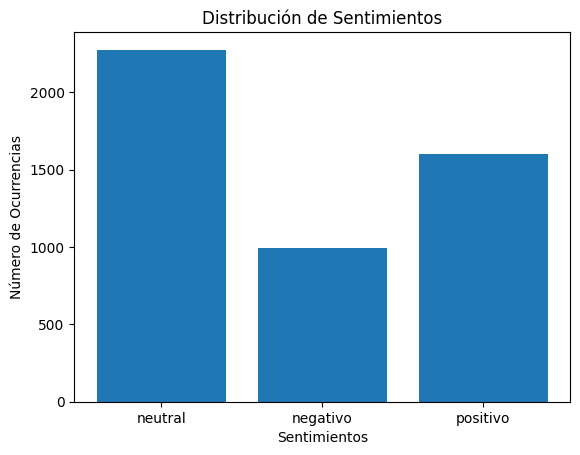

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por sentimiento y contar el número de ocurrencias de cada valor
sentiment_counts = df1.groupBy("sentiment").count().collect()

# Crear una lista de etiquetas para las barras
labels = [row["sentiment"] for row in sentiment_counts]

# Crear una lista de valores para las barras
values = [row["count"] for row in sentiment_counts]

# Crear el gráfico de barras
plt.bar(labels, values)

# Agregar etiquetas al gráfico
plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimientos")
plt.ylabel("Número de Ocurrencias")

# Mostrar el gráfico
plt.show()

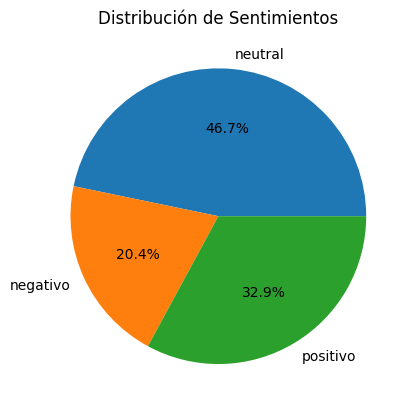

In [ ]:
# Crear el gráfico de pastel con porcentajes
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Agregar título al gráfico
plt.title("Distribución de Sentimientos")

# Mostrar el gráfico
plt.show()